# Finance Analysis Capstone

Install panda's datareader, for reading directly financial and economic fata from the web:
```python
    pip/3 install pandas-datareader
```
Documentation:
    https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

We can access many values from different sources: Wourld Bank, Alpha Vantage, Quandl, Yahoo, etc.

In order to get the symbols, go for example to https://finance.yahoo.com/ and look for stock or financial values, e.g., Bitcoin, Nasdaq -- each data source has the ticker/symbol in parentheses.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [2]:
start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [3]:
# Crypto
BTC = data.DataReader("BTC-USD", 'yahoo', start, end)
ETH = data.DataReader("ETH-USD", 'yahoo', start, end)

In [4]:
# Marjet composites
SP500 = data.DataReader("^GSPC", 'yahoo', start, end)
NASDAQ = data.DataReader("^IXIC", 'yahoo', start, end)
IBEX = data.DataReader("^IBEX", 'yahoo', start, end)
DAX = data.DataReader("^GDAXI", 'yahoo', start, end)

In [5]:
# Forex
EURUSD = data.DataReader("EURUSD=X", 'yahoo', start, end)

In [6]:
# Commodities
OIL = data.DataReader("CL=F", 'yahoo', start, end)
GOLD = data.DataReader("GC=F", 'yahoo', start, end)

In [7]:
# Stocks
TESLA = data.DataReader("TSLA", 'yahoo', start, end)

In [8]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [9]:
# We can create a panel object too
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [10]:
df.head()

Attributes  Adj Close                                                \
Symbols           BAC           C          GS        JPM         MS   
Date                                                                  
2006-01-03  34.596096  379.511047  105.687309  26.974699  36.975834   
2006-01-04  34.228691  372.504486  104.227493  26.818987  37.001183   
2006-01-05  34.272778  374.352448  104.186478  26.900234  37.102646   
2006-01-06  34.221321  374.352448  105.662666  27.089762  37.140705   
2006-01-09  34.243366  372.581421  106.933891  27.529747  37.533863   

Attributes                 Close                                     ...  \
Symbols           WFC        BAC           C          GS        JPM  ...   
Date                                                                 ...   
2006-01-03  20.723480  47.080002  492.899994  128.869995  40.189999  ...   
2006-01-04  20.483118  46.580002  483.799988  127.089996  39.619999  ...   
2006-01-05  20.460379  46.639999  486.200012  127.040001  39.740002  ...   
2006-01-06  20.580564  46.570000  486.200012  128.839996  40.020000  ...   
2006-01-09  20.577309  46.599998  483.899994  130.389999  40.669998  ...   

Attributes        Open                                       Volume  \
Symbols             GS        JPM         MS        WFC         BAC   
Date                                                                  
2006-01-03  126.699997  39.830002  57.169998  31.600000  16296700.0   
2006-01-04  127.349998  39.779999  58.700001  31.799999  17757900.0   
2006-01-05  126.000000  39.610001  58.549999  31.500000  14970700.0   
2006-01-06  127.290001  39.919998  58.770000  31.580000  12599800.0   
2006-01-09  128.500000  39.880001  58.630001  31.674999  15619400.0   

Attributes                                                           
Symbols             C         GS         JPM         MS         WFC  
Date                                                                 
2006-01-03  1537600.0  6188700.0  12838600.0  5377000.0  11016400.0  
2006-01-04  1870960.0  4861600.0  13491500.0  7977800.0  10870000.0  
2006-01-05  1143160.0  3717400.0   8109400.0  5778000.0  10158000.0  
2006-01-06  1370210.0  4319600.0   7966900.0  6889800.0   8403800.0  
2006-01-09  1680740.0  4723500.0  16575200.0  4144500.0   5619600.0  

[5 rows x 36 columns]

In [11]:
# Ticker symbols in alphabetical order
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
# Concatenate all bank stocks
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [19]:
# Multi-level column heads
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.596096  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.228691  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.272778  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.221321  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.243366  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.975834  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.001183  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.102646  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.140705  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.533863  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

In [20]:
# Multi-level names
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [21]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.596096  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.228691  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.272778  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.221321  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.243366  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.975834  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.001183  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.102646  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.140705  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.533863  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.723480  
2006-01-04   31.799999  31.530001  10870000.0  20.483118  
2006-01-05   31.500000  31.495001  10158000.0  20.460379  
2006-01-06   31.580000  31.680000   8403800.0  20.580564  
2006-01-09   31.674999  31.674999   5619600.0  20.577309  

[5 rows x 36 columns]

## Exploration Data Analysis

In [27]:
# The max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

In [28]:
# Returns

Returns of the banks:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [23]:
returns = pd.DataFrame()

In [24]:
# Return of the banks
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
# The return percent of the first day is NaN
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


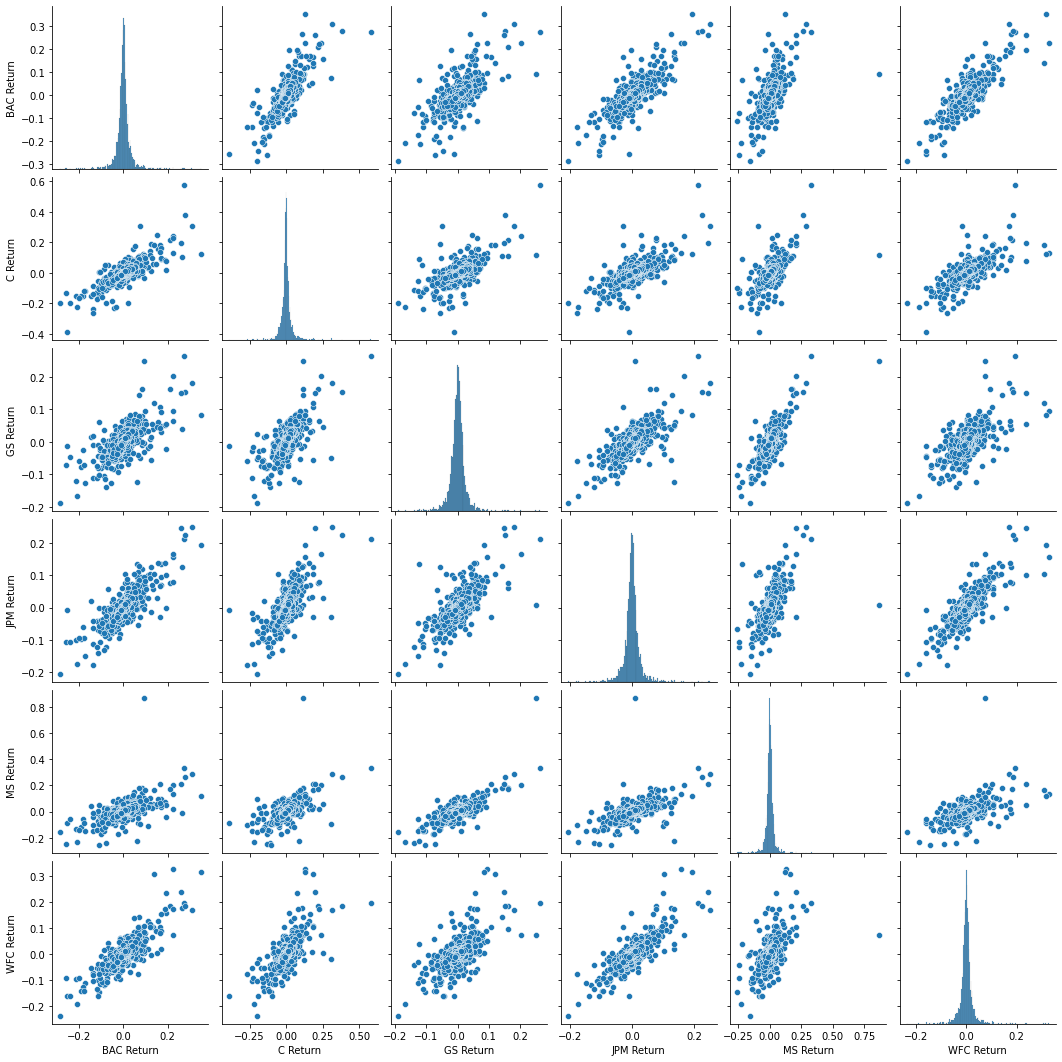

In [26]:
# Plot everything which is not NaN
import seaborn as sns
sns.pairplot(returns[1:].dropna())

In [29]:
# Worst historical returns
returns.min()

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [31]:
# Dates of worst historical returns
# Google what happened on that day...
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [33]:
# Highest returns
returns.max()

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [34]:
# Dates of highest returns
# Google what happened on that day...
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [ ]:
# Risk: it can be computed with the std. deviation
# High std. dev., more up/down, riskier